In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Data

In [10]:
df=pd.read_csv('Student_Performance.csv')

In [11]:
df.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [12]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


## 1) Checking for Outliers

In [18]:
iqr=df['Hours Studied'].quantile(0.75)-df['Hours Studied'].quantile(0.25)
ut=df['Hours Studied'].quantile(0.75)+1.5*iqr
lt=df['Hours Studied'].quantile(0.25)-1.5*iqr
print('Upper threshold - ', round(ut,3),'Lower threshold - ', round(lt,3))
print('max - ', max(df['Hours Studied']),'min - ', min(df['Hours Studied']))

Upper threshold -  13.0 Lower threshold -  -3.0
max -  9 min -  1


In [19]:
iqr=df['Previous Scores'].quantile(0.75)-df['Previous Scores'].quantile(0.25)
ut=df['Previous Scores'].quantile(0.75)+1.5*iqr
lt=df['Previous Scores'].quantile(0.25)-1.5*iqr
print('Upper threshold - ', round(ut,3),'Lower threshold - ', round(lt,3))
print('max - ', max(df['Previous Scores']),'min - ', min(df['Previous Scores']))

Upper threshold -  131.5 Lower threshold -  7.5
max -  99 min -  40


In [20]:
iqr=df['Sleep Hours'].quantile(0.75)-df['Sleep Hours'].quantile(0.25)
ut=df['Sleep Hours'].quantile(0.75)+1.5*iqr
lt=df['Sleep Hours'].quantile(0.25)-1.5*iqr
print('Upper threshold - ', round(ut,3),'Lower threshold - ', round(lt,3))
print('max - ', max(df['Sleep Hours']),'min - ', min(df['Sleep Hours']))

Upper threshold -  12.5 Lower threshold -  0.5
max -  9 min -  4


In [21]:
iqr=df['Sample Question Papers Practiced'].quantile(0.75)-df['Sample Question Papers Practiced'].quantile(0.25)
ut=df['Sample Question Papers Practiced'].quantile(0.75)+1.5*iqr
lt=df['Sample Question Papers Practiced'].quantile(0.25)-1.5*iqr
print('Upper threshold - ', round(ut,3),'Lower threshold - ', round(lt,3))
print('max - ', max(df['Sample Question Papers Practiced']),'min - ', min(df['Sample Question Papers Practiced']))

Upper threshold -  14.5 Lower threshold -  -5.5
max -  9 min -  0


### Clipping sample

In [22]:
df['Sample Question Papers Practiced'] = df['Sample Question Papers Practiced'].clip(lt,ut)
df['Sample Question Papers Practiced'].describe()

count    10000.000000
mean         4.583300
std          2.867348
min          0.000000
25%          2.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Sample Question Papers Practiced, dtype: float64

## 2) Checking for any Missing Value

In [24]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

## 3) Checking for DataType of Column

In [25]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

## 4) Checking for duplicates in the Dataset

In [26]:
print('Datasets before removing: ', df.shape)
df=df.drop_duplicates()
print('Datasets after removing: ', df.shape)

Datasets before removing:  (10000, 6)
Datasets after removing:  (9873, 6)


## Encoding 'Extra Curricular Activities'

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ed = le.fit_transform(df['Extracurricular Activities'])


In [36]:
df['Extracurricular_Activities']=ed
df.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular_Activities
0,7,99,Yes,9,1,91.0,1
1,4,82,No,4,2,65.0,0
2,8,51,Yes,7,2,45.0,1
3,5,52,Yes,5,2,36.0,1
4,7,75,No,8,5,66.0,0
5,3,78,No,9,6,61.0,0
6,7,73,Yes,5,6,63.0,1
7,8,45,Yes,4,6,42.0,1
8,5,77,No,8,2,61.0,0
9,4,89,No,4,0,69.0,0


In [37]:
del df['Extracurricular Activities']

In [40]:
df=df[['Hours Studied','Previous Scores','Extracurricular_Activities','Sleep Hours','Sample Question Papers Practiced','Performance Index']]

In [43]:
df.head(10)

,Hours Studied,Previous Scores,Extracurricular_Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
5,3,78,0,9,6,61.0
6,7,73,1,5,6,63.0
7,8,45,1,4,6,42.0
8,5,77,0,8,2,61.0
9,4,89,0,4,0,69.0


## 5) Checking whether feature vs Target has a Linear Relationship

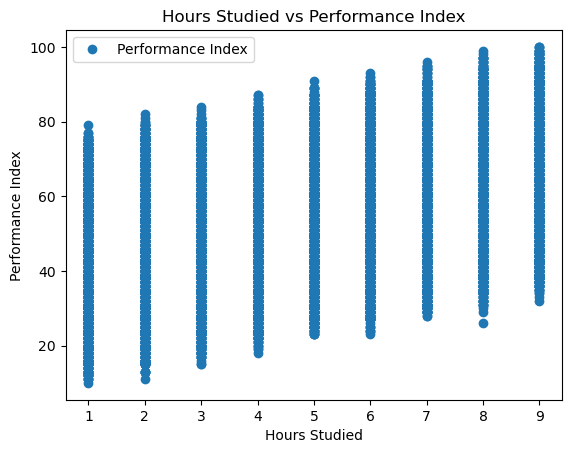

In [27]:
df.plot(x='Hours Studied',y='Performance Index',style='o')
plt.title('Hours Studied vs Performance Index')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.show()

In [30]:
df[['Hours Studied','Performance Index']].corr()

,Hours Studied,Performance Index
Hours Studied,1.000000,0.375332
Performance Index,0.375332,1.000000


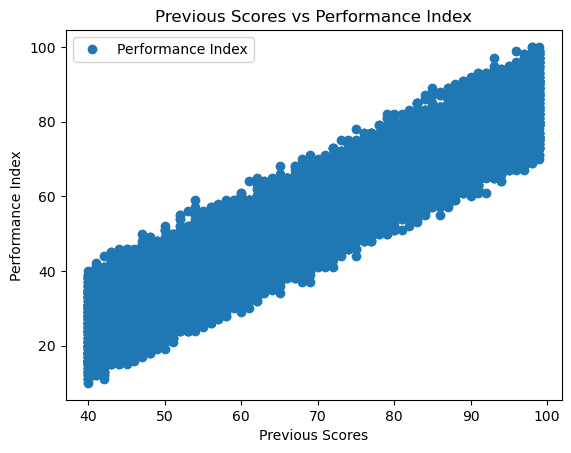

In [31]:
df.plot(x='Previous Scores',y='Performance Index',style='o')
plt.title('Previous Scores vs Performance Index')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.show()

In [32]:
df[['Previous Scores','Performance Index']].corr()

,Previous Scores,Performance Index
Previous Scores,1.000000,0.915135
Performance Index,0.915135,1.000000


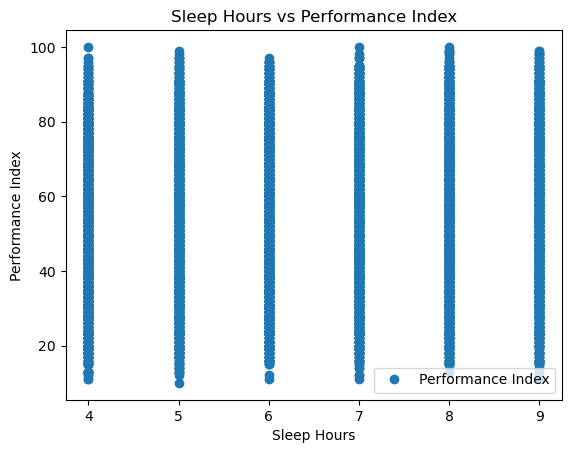

In [46]:
df.plot(x='Sleep Hours',y='Performance Index',style='o')
plt.title('Sleep Hours vs Performance Index')
plt.xlabel('Sleep Hours')
plt.ylabel('Performance Index')
plt.show()

In [47]:
df[['Sleep Hours','Performance Index']].corr()

,Sleep Hours,Performance Index
Sleep Hours,1.000000,0.050352
Performance Index,0.050352,1.000000


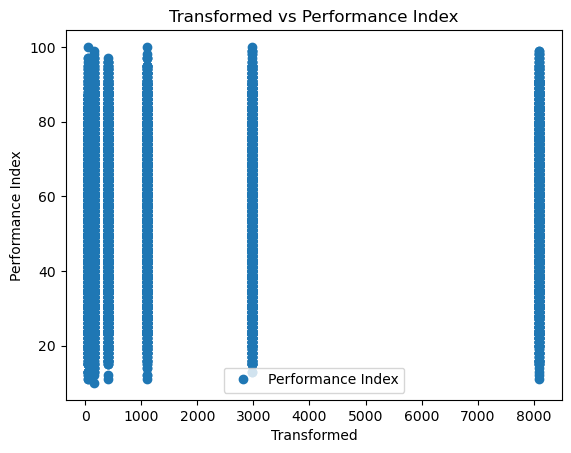

,Transformed,Performance Index
Transformed,1.000000,0.046173
Performance Index,0.046173,1.000000


In [55]:
df['Transformed']=np.exp(df['Sleep Hours'])
df.plot(x='Transformed',y='Performance Index',style='o')
plt.title('Transformed vs Performance Index')
plt.xlabel('Transformed')
plt.ylabel('Performance Index')
plt.show()
df[['Transformed','Performance Index']].corr()

#### There is no linear relationship between Sleep Hours and Performance Index; Have tried all transformations - still not able to see a good linear relationship

#### so, we are deleting Sleep Hours column

#### Transformations which we tried are x^2, x^3, x^0.5, e^x and log(x)

In [56]:
del df['Transformed']

In [57]:
del df['Sleep Hours']

In [58]:
df.head(10)

,Hours Studied,Previous Scores,Extracurricular_Activities,Sample Question Papers Practiced,Performance Index
0,7,99,1,1,91.0
1,4,82,0,2,65.0
2,8,51,1,2,45.0
3,5,52,1,2,36.0
4,7,75,0,5,66.0
5,3,78,0,6,61.0
6,7,73,1,6,63.0
7,8,45,1,6,42.0
8,5,77,0,2,61.0
9,4,89,0,0,69.0


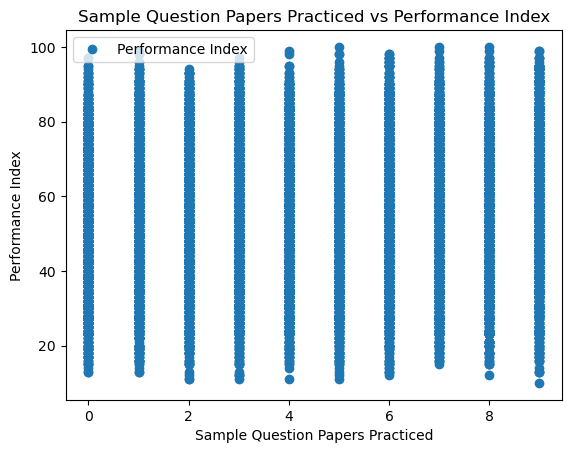

In [59]:
df.plot(x='Sample Question Papers Practiced',y='Performance Index',style='o')
plt.title('Sample Question Papers Practiced vs Performance Index')
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Performance Index')
plt.show()

In [60]:
df[['Sample Question Papers Practiced','Performance Index']].corr()

,Sample Question Papers Practiced,Performance Index
Sample Question Papers Practiced,1.000000,0.043436
Performance Index,0.043436,1.000000


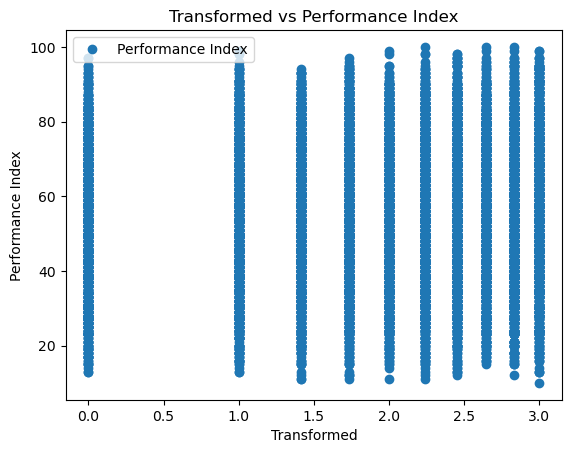

,Transformed,Performance Index
Transformed,1.000000,0.045899
Performance Index,0.045899,1.000000


In [65]:
df['Transformed']=np.power(df['Sample Question Papers Practiced'],0.5)
df.plot(x='Transformed',y='Performance Index',style='o')
plt.title('Transformed vs Performance Index')
plt.xlabel('Transformed')
plt.ylabel('Performance Index')
plt.show()
df[['Transformed','Performance Index']].corr()

#### There is no linear relationship between Sample Question Papers Practiced and Performance Index; Have tried all transformations - still not able to see a good linear relationship

#### so, we are deleting Sample Question Papers Practiced column

#### Transformations which we tried are x^2, x^3, x^0.5, e^x and log(x)

In [68]:
del df['Transformed']

In [70]:
del df['Sample Question Papers Practiced']

In [71]:
df.head(10)

,Hours Studied,Previous Scores,Extracurricular_Activities,Performance Index
0,7,99,1,91.0
1,4,82,0,65.0
2,8,51,1,45.0
3,5,52,1,36.0
4,7,75,0,66.0
5,3,78,0,61.0
6,7,73,1,63.0
7,8,45,1,42.0
8,5,77,0,61.0
9,4,89,0,69.0


In [77]:
X=df[['Hours Studied','Previous Scores','Extracurricular_Activities']].values
y=df['Performance Index'].values

## 6) Splitting DATA

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

## 7) Scaling the Data

In [83]:
from sklearn.preprocessing import StandardScaler ## standard scaling 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

# Task - SL - Linear Regression

In [85]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

# Model

In [92]:
coef_df=pd.DataFrame(lr.coef_,['Hours Studied','Previous Scores','Extracurricular_Activities'],columns=['Coefficient'])
coef_df

,Coefficient
Hours Studied,7.375503
Previous Scores,17.674577
Extracurricular_Activities,0.306925


In [89]:
lr.intercept_

55.181438338819945

In [94]:
print(f'''Model:
Performance Index={round(coef_df.iloc[0].values[0],2)}*Hours Studied + {round(coef_df.iloc[1].values[0],2)}*Previous Scores + {round(coef_df.iloc[2].values[0],2)}*Extracurricular_Activities + {lr.intercept_}
''')

Model:
Performance Index=7.38*Hours Studied + 17.67*Previous Scores + 0.31*Extracurricular_Activities + 55.181438338819945



In [96]:
lr.predict(scaler.transform(np.array([[8,55,1]])))

array([49.40144578])

# Loss

In [97]:
y_pred = lr.predict(X_test_scaled)
loss = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
loss

,Actual,Predicted
0,40.0,39.618896
1,37.0,37.784110
2,26.0,22.700420
3,45.0,44.301967
4,77.0,74.667322
...,...,...
1970,68.0,63.450141
1971,77.0,79.958492
1972,86.0,88.721261
1973,70.0,69.973243


In [98]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 5.423470537946101


# Evaluation Metric

In [99]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9851708118902772
